**1. Download IMDB Dataset**

In [1]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: d:\AIO2024\module_3\week_5\Sentiment_Analysis\IMDB-Dataset.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<00:29, 2.22MB/s]
  2%|▏         | 1.05M/66.2M [00:00<00:19, 3.35MB/s]
  2%|▏         | 1.57M/66.2M [00:00<00:20, 3.16MB/s]
  7%|▋         | 4.72M/66.2M [00:00<00:05, 10.8MB/s]
 10%|█         | 6.82M/66.2M [00:00<00:04, 13.3MB/s]
 13%|█▎        | 8.39M/66.2M [00:01<00:14, 4.07MB/s]
 23%|██▎       | 15.2M/66.2M [00:01<00:04, 10.7MB/s]
 29%|██▊       | 18.9M/66.2M [00:01<00:03, 13.8MB/s]
 33%|███▎      | 22.0M/66.2M [00:02<00:03, 13.4MB/s]
 37%|███▋      | 24.6M/66.2M [00:02<00:03, 13.8MB/s]
 41%|████      | 27.3M/66.2M [00:02<00:02, 13.7MB/s]
 44%|████▍     | 29.4M/66.2M [00:02<00:02, 13.3MB/s]
 48%|████▊     | 31.5M/66.2M [00:02<00:02, 13.3MB/s]
 51%|█████     | 33.6M/66.2M [00:03<00:02, 11.8MB/s]
 53%|█████▎    | 35.1M/66.2M [00:03<00:02, 11.8MB/s]
 55%|███

**2. Reading and preprocessing data**

In [2]:
import pandas as pd

df = pd.read_csv('IMDB-Dataset.csv')
df = df.drop_duplicates()

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
# from pycontractions import Contractions

stop = set(stopwords.words('english'))

def expand_contractions(text):
    return contractions.fix(text)

def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, 'html.parser') # removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # expanding chatwords and contracts clearing contractions

    emoji_clean = re.compile("["
        u"\U0001F600-\U0001F64F"   # emoticons
        u"\U0001F300-\U0001F5FF"   # symbols & pictographs
        u"\U0001F680-\U0001F6FF"   # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"   # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text) # add space after full stop
    text = re.sub(r'http\S+', '', text) # remove urls
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuations and make lowercase
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) # lemmatize
    return text

[nltk_data] Downloading package stopwords to C:\Users\LENOVO
[nltk_data]     IDEAPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LENOVO
[nltk_data]     IDEAPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df['review'] = df['review'].apply(preprocess_text)

C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_8976\136930505.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') # removing html tags


**3. Data analysis**

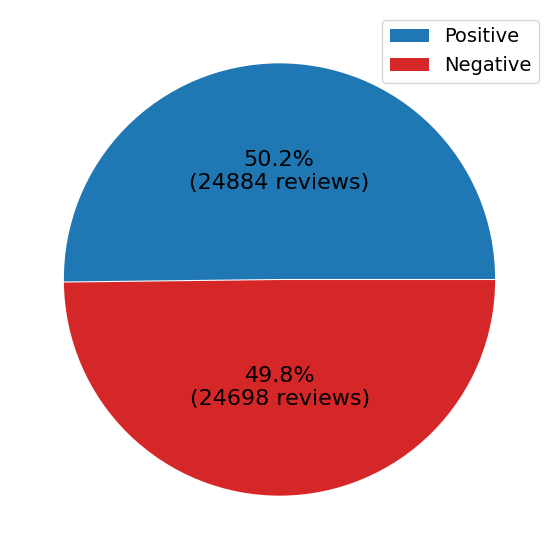

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} reviews)".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc='best', prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

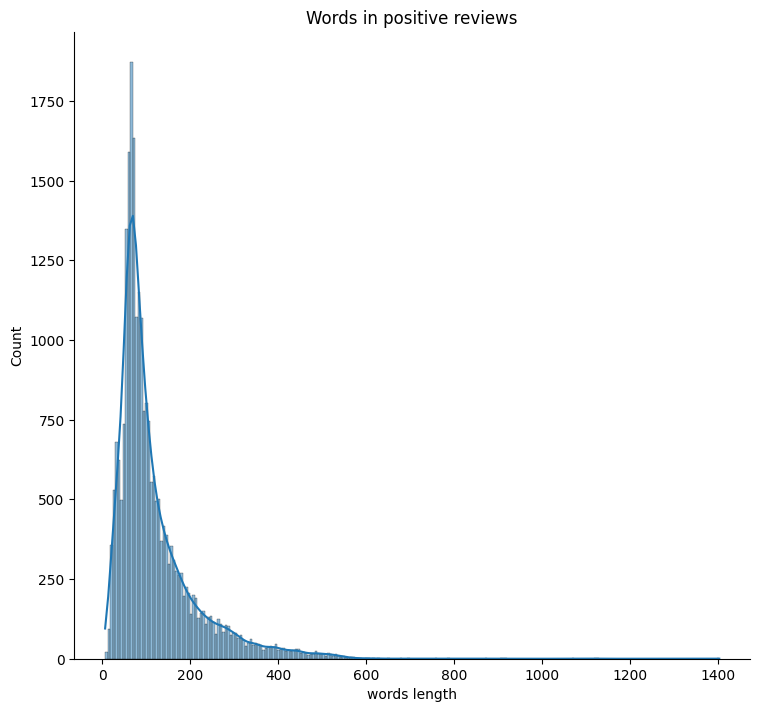

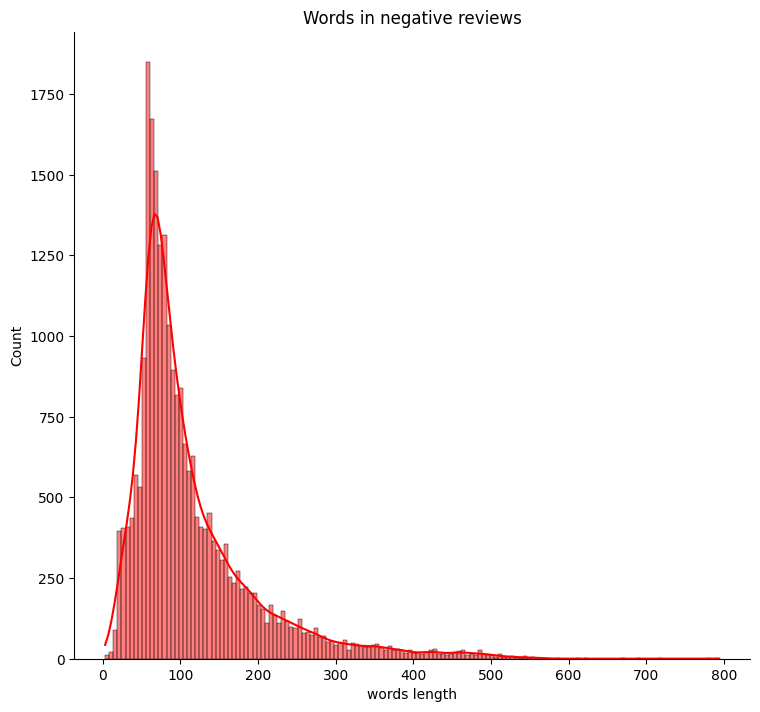

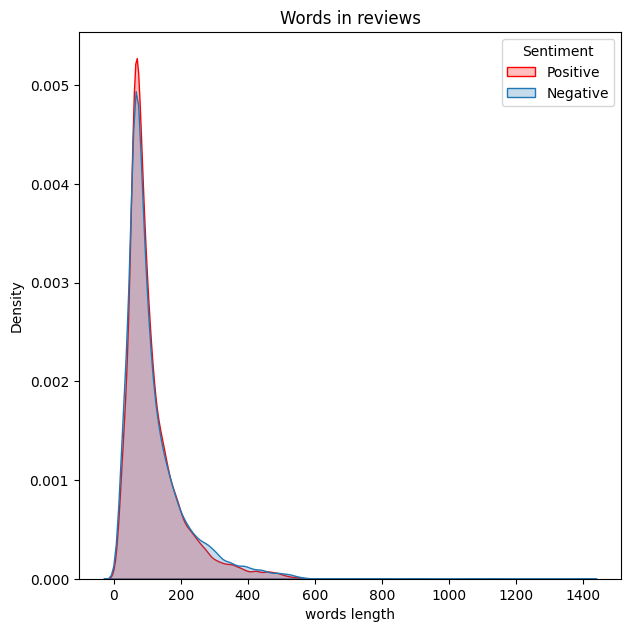

In [7]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(data=df_temp[df_temp['sentiment'] == 'positive'], x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(data=df_temp[df_temp['sentiment'] == 'negative'], x='words length', hue='sentiment', kde=True, height=7, aspect=1.1, legend=False, palette=['red']).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(data=df_temp, x='words length', hue='sentiment', fill=True, palette=[sns.color_palette()[0], 'red']).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show(kernel_distribution_number_words_plot)

**4. Split the data into training and testing**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(df['review'], y_data, test_size=0.2, random_state=42)

**5. Vectorization**

In [9]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train, y_train)

X_train_encoded = tfidf_vectorizer.transform(X_train)
X_test_encoded = tfidf_vectorizer.transform(X_test)

**6. Trainnig and evaluating model**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [11]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(X_train_encoded, y_train)
y_pred = dt_classifier.predict(X_test_encoded)
accuracy_score(y_pred, y_test)

0.7180598971463145

In [12]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)
y_pred = rf_classifier.predict(X_test_encoded)
accuracy_score(y_pred, y_test)

0.8420893415347384

In [13]:
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train_encoded, y_train)
y_pred = ada_classifier.predict(X_test_encoded)
accuracy_score(y_pred, y_test)

0.7930825854593123

In [14]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_encoded, y_train)
y_pred = gb_classifier.predict(X_test_encoded)
accuracy_score(y_pred, y_test)

0.7968135524856307